# Wstęp

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import plotly.express as px

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
nasiona = pd.read_csv('/content/drive/MyDrive/Eksploracja i wizualizacja danych/Projekt/Dane/Seed_Data.csv')
y = nasiona['target']
nasiona.drop('target', axis=1, inplace=True)
nasiona

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [4]:
kama = nasiona.iloc[ :70, :]
rosa = nasiona.iloc[ 70:140, :]
canadian = nasiona.iloc[ 140:210, :]

# Faza 3 - Ocena danych

In [5]:
nasiona.isna().any()

A         False
P         False
C         False
LK        False
WK        False
A_Coef    False
LKG       False
dtype: bool

In [6]:
nasiona.dtypes

A         float64
P         float64
C         float64
LK        float64
WK        float64
A_Coef    float64
LKG       float64
dtype: object

In [7]:
nasiona.describe()

,A,P,C,LK,WK,A_Coef,LKG
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


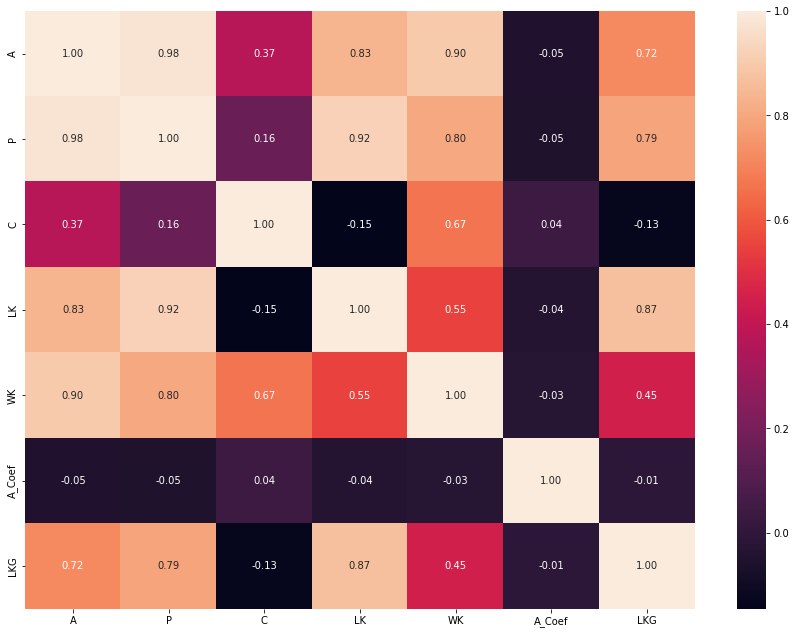

In [8]:
kama_correl = kama.corr()
plt.figure(figsize=(15, 11))
sb.heatmap(kama_correl, annot=True, fmt=".2f")

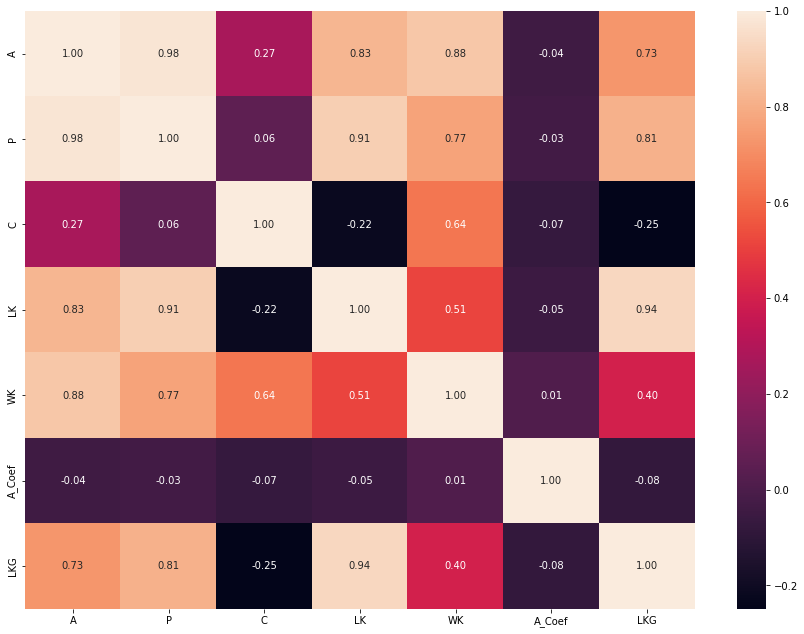

In [9]:
rosa_correl = rosa.corr()
plt.figure(figsize=(15, 11))
sb.heatmap(rosa_correl, annot=True, fmt=".2f")

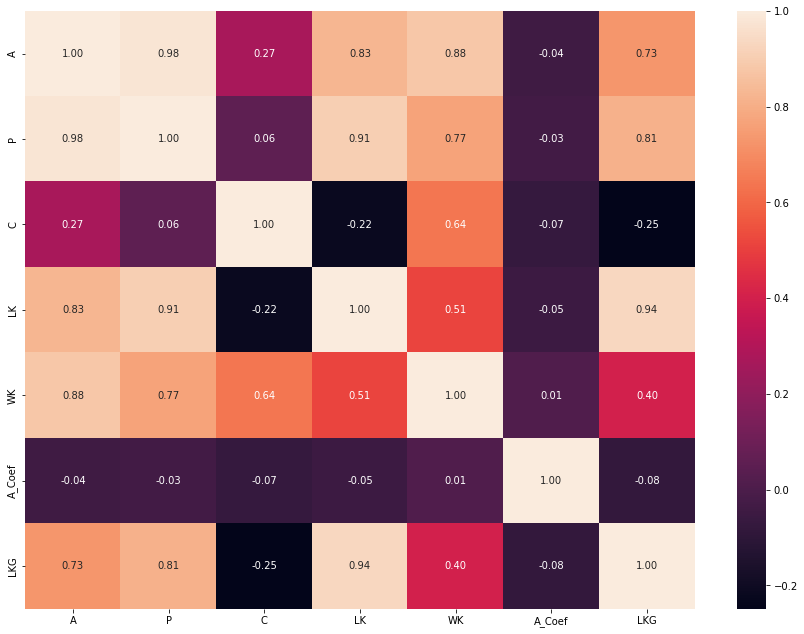

In [10]:
canadian_correl = rosa.corr()
plt.figure(figsize=(15, 11))
sb.heatmap(canadian_correl, annot=True, fmt=".2f")

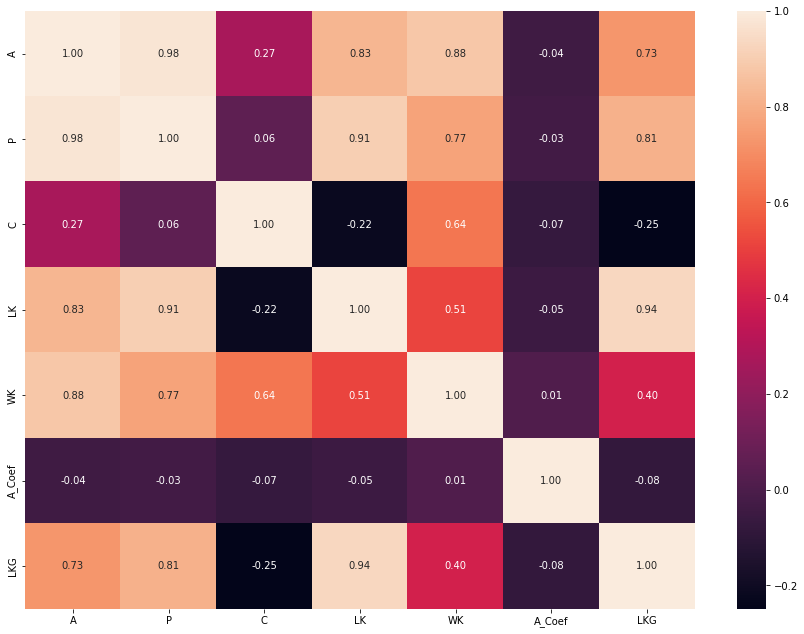

In [11]:
nasiona_correl = rosa.corr()
plt.figure(figsize=(15, 11))
sb.heatmap(nasiona_correl, annot=True, fmt=".2f")

# Faza 4 - Przetwarzanie danych

In [12]:
nasiona.drop(['C', 'A_Coef'], axis=1, inplace=True)

In [13]:
nasiona_norm = nasiona.copy()

In [21]:
for column in nasiona_norm.columns:
    nasiona_norm[column] = nasiona_norm[column]  / nasiona_norm[column].abs().max()

# Faza 5 - Modelowanie

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# Jaka liczba klastrów jest najlepsza?

In [18]:
grade = {}
wcss = []
silhouette = []

for k in range(2, 8): 
    k_means = KMeans(n_clusters = k)
    k_means.fit(nasiona_norm)

    predicted = k_means.predict(nasiona_norm)
    silhouette_avg = silhouette_score(nasiona_norm, predicted)

    grade[k] = [k_means.inertia_, silhouette_avg]
    silhouette.append(silhouette_avg)
    wcss.append(k_means.inertia_)

In [19]:
k = [i for i in range(1, 7)]

In [20]:
norm_wcss = []

for score in wcss:
  norm_wcss.append((score - min(wcss)) / (max(wcss) - min(wcss)))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(name="WCSS", x=k, y=norm_wcss))
fig.add_trace(go.Line(name="Silhouette", x=k, y=silhouette))
fig.update_layout( width=1100, height=1000, title='Wykres łokciowy ze średnią Silhouette\a', paper_bgcolor='LightGrey')
fig.show()

In [25]:
# Grupowanie kmeans

In [26]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(nasiona_norm)

In [28]:
y_kmeans = kmeans.predict(nasiona_norm)

In [ ]:
y_kmeans

In [30]:
# PCA

In [31]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(nasiona_norm)

In [33]:
nasiona_trans = pca.transform(nasiona_norm)

In [ ]:
nasiona_trans

In [ ]:
fig = px.scatter(x=nasiona_trans[:, 0], y=nasiona_trans[:, 1], height=1000)
fig.show()

# Faza 6 i 7

In [67]:
# Przetwarzanie wyników

In [68]:
results = pd.DataFrame(nasiona_trans)

In [69]:
y_kmeans_series = pd.Series(y_kmeans)

In [72]:
results['y_kmeans'] = y_kmeans_series
results['y'] = y

In [73]:
results['y_kmeans'] = results['y_kmeans'].apply(lambda x: str(x))
results['y'] = results['y'].apply(lambda x: str(x))

In [ ]:
results.dtypes

In [75]:
def to_species(elem):
  if elem == '0':
    return 'Kama'
  elif elem == '1':
    return 'Rosa'
  else:
    return 'Canadian'

In [76]:
results['y'] = results['y'].apply(lambda x: to_species(x))

In [77]:
results

,0,1,y_kmeans,y
0,0.021978,0.024845,0,Kama
1,-0.016812,0.065438,0,Kama
2,-0.064563,0.090052,0,Kama
3,-0.076989,0.093412,0,Kama
4,0.073573,0.076378,0,Kama
...,...,...,...,...
205,-0.194941,0.028451,2,Canadian
206,-0.246105,-0.019446,2,Canadian
207,-0.111149,0.044363,2,Canadian
208,-0.211296,-0.016090,2,Canadian


In [78]:
# Wykres PCA

In [79]:
fig = px.scatter(results, x=0, y=1, color='y_kmeans', symbol='y', title='Zgrupowane nasiona na wykresie składowych głównych', labels={'y_kmeans': 'Klaster', 'y': 'Gatunek', '0': 'PCA1', '1': 'PCA2'})
fig.update_layout(width=1600, height=1000, paper_bgcolor='LightGrey')
fig.show()

In [48]:
# Histogram poszczególnych klastrów z gatunkami

In [80]:
cluster_species = results[['y_kmeans', 'y']]
cluster_species = cluster_species.groupby(['y_kmeans', 'y']).size().unstack()

In [ ]:
fig = px.bar(cluster_species, title='Udział gatunków w poszczególnych klastrach', labels={'y': 'Gatunek', 'value': 'count', 'y_kmeans': 'Klastry'})
fig.update_layout(width=1100, height=700, paper_bgcolor='LightGrey')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [51]:
# Czystość klastrów

In [82]:
cluster_0 = results[results['y_kmeans'] == '0']
cluster_1 = results[results['y_kmeans'] == '1']
cluster_2 = results[results['y_kmeans'] == '2']

In [83]:
cluster_species0 = cluster_0[['y_kmeans', 'y']]
cluster_species0 = cluster_species0.groupby('y').aggregate({'y': 'count'})
cluster_species0.rename(columns={'y': 'count'}, inplace=True)
cluster_species0

,count
y,
Canadian,1
Kama,54
Rosa,10


In [84]:
cluster_species1 = cluster_1[['y_kmeans', 'y']]
cluster_species1 = cluster_species1.groupby('y').aggregate({'y': 'count'})
cluster_species1.rename(columns={'y': 'count'}, inplace=True)
cluster_species1

,count
y,
Kama,2
Rosa,60


In [85]:
cluster_species2 = cluster_2[['y_kmeans', 'y']]
cluster_species2 = cluster_species2.groupby('y').aggregate({'y': 'count'})
cluster_species2.rename(columns={'y': 'count'}, inplace=True)
cluster_species2

,count
y,
Canadian,69
Kama,14


In [86]:
list(cluster_species0.index)

['Canadian', 'Kama', 'Rosa']

In [87]:
fig0 = go.Figure(data=[go.Pie(labels=list(cluster_species0.index), values=list(cluster_species0['count']))])
fig1 = go.Figure(data=[go.Pie(labels=list(cluster_species1.index), values=list(cluster_species1['count']))])
fig2 = go.Figure(data=[go.Pie(labels=list(cluster_species2.index), values=list(cluster_species2['count']))])

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]], subplot_titles=('Klaster 1', 'Klaster 0', 'Klaster 2'))
fig.add_trace(fig0.data[0], 1, 2)
fig.add_trace(fig1.data[0], 1, 1)
fig.add_trace(fig2.data[0], 1, 3)
fig.update_layout(title='Procentowy udział gatunków w poszczególnych klastrach', paper_bgcolor='LightGrey')

fig.show()